# (Explore Bike Share Data)
## by (Reham Rafee Ahmed)

## Investigation Overview

> In this investigation, I wanted to look at the factors that affect the duration of the trips and also the factors that cause increase or decrease in the number of the trips. The main focus was on the the gender of the members and their birth year the days of week the trips taken in and also the part of day.

## Dataset Overview

> The data consisted of trip duration and attributes of approximately 180000 member data. of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.I also developped new variables column from the provided start and end time of the trips those columns contain the day of the week which the trip done in also the part of day.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
### first we will make a copy to perform the cleaning process on
df_clean = df.copy()

In [7]:
# dealing with the null values in member_birth_year
df_clean['member_birth_year'].fillna(df_clean['member_birth_year'].mean())

0         1984.000000
1         1984.806437
2         1972.000000
3         1989.000000
4         1974.000000
             ...     
183407    1996.000000
183408    1984.000000
183409    1990.000000
183410    1988.000000
183411    1989.000000
Name: member_birth_year, Length: 183412, dtype: float64

In [9]:
#dealing with the other value in member_gender
df_clean['member_gender'].replace(['Other'],['Male'], regex=True, inplace = True)

In [10]:
# dealing with the null values in member_gender
df_clean['member_gender'].fillna(df_clean['member_gender'].mode())

0         Male
1          NaN
2         Male
3         Male
4         Male
          ... 
183407    Male
183408    Male
183409    Male
183410    Male
183411    Male
Name: member_gender, Length: 183412, dtype: object

In [11]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

In [13]:
##  Feature Engineering:
# Extracting hour from start_time column
df_clean['trip_hour_start'] = df_clean['start_time'].dt.hour

In [14]:
# dividing the day in different parts
def f(x):
    if (x > 4) and (x <= 12):
        return 'morning'
    elif (x > 12) and (x <= 18):
        return'noon'
    elif (x > 18) and (x <= 24):
        return'night'
    elif (x <= 4):
        return'late_night'

In [15]:
df_clean['day_part_start'] = df_clean['trip_hour_start'].apply(f)

In [16]:
# Extracting day from end_time column
df_clean['trip_day_start'] = df_clean['start_time'].dt.strftime("%A")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## ( Distribution of Trip Duration)

> Duration  a lot of trips takes less than 1000 second. When plotted on a log-scale, the duration distribution looks unimodal, with one peak between 500 and 1000.
> In other words, most trips are short and do not exceed 15 minutes 

In [17]:
# dealing with the outliers values in duration
q1 = df_clean['duration_sec'].quantile(0.99)
q1

3458.889999999985

In [18]:
df_clean = df_clean[df_clean['duration_sec'] < q1]

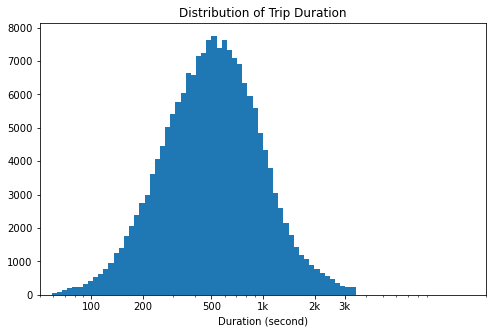

In [39]:
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of Trip Duration')
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlim([50, 2e4])
plt.xscale('log')
plt.xticks([ 100, 200, 500, 1000, 2e3, 3e3], [ 100, 200, 500, '1k', '2k', '3k'])
plt.xlabel('Duration (second)')
plt.show()

## (Distribution of Trip Duration)

> Most users birth year falls between 1980 and 2000
> In other words youth people

In [40]:
# dealing with the outliers values in member_birth_year
q = df_clean['member_birth_year'].quantile(0.01)
q

1955.0

In [41]:
df_clean = df_clean[df_clean['member_birth_year'] > q]

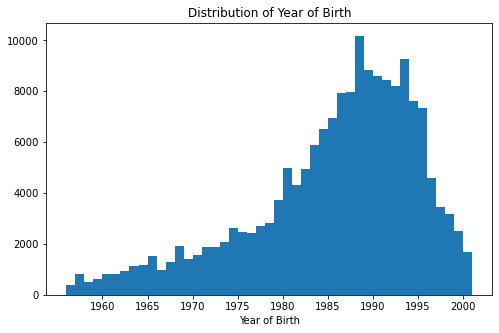

In [44]:
binsize = 1
bins = np.arange(1956,df_clean['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of Year of Birth')
plt.hist(data = df_clean, x = 'member_birth_year', bins = bins)
plt.xlabel('Year of Birth')
plt.xticks([ 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,2000])
plt.show()

## (Distribution of member gender across the day of the week)
> First, We have a much more male users than females
>Second, The usage of the bike share system decrease in both Saturday and Sunday or the weekend




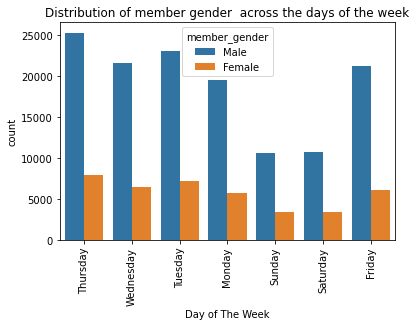

In [51]:
sb.countplot(data = df_clean, x = 'trip_day_start', hue = 'member_gender')
plt.title('Distribution of member gender  across the days of the week')
plt.xlabel('Day of The Week')
plt.xticks(rotation=90);

## (Distribution of part of day trips across the day of the week)
> Through out the week most trips occur during the morning and noon period of the day with small difference except for the  weekend where more trips occur during noon by big differnce than other periods.

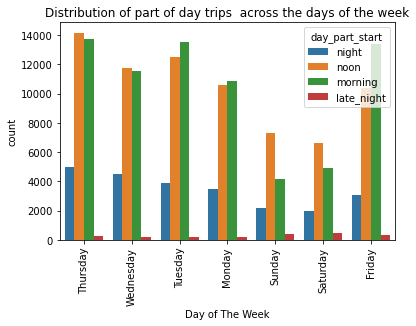

In [53]:
sb.countplot(data = df_clean, x = 'trip_day_start', hue = 'day_part_start')
plt.title('Distribution of part of day trips  across the days of the week')
plt.xlabel('Day of The Week')
plt.xticks(rotation=90);

## (Distribution of Trip Duration across Member gender and the day of the week)
> Trip duration in both member genders peak in weekend and the duration in males trip much longer than the femaleS.

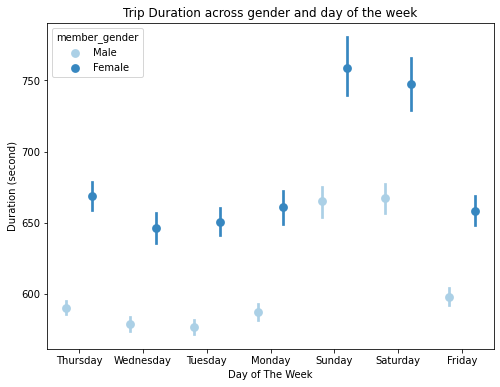

In [57]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'trip_day_start', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and day of the week')
plt.ylabel('Duration (second)')
ax.set_yticklabels([],minor = True)
plt.xlabel('Day of The Week')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!